In [13]:
%matplotlib
%matplotlib inline
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

Using matplotlib backend: Qt5Agg


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

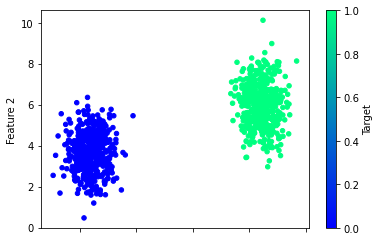

In [14]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 604us/sample - loss: 0.8496 - accuracy: 0.0840
Epoch 2/100
750/750 [==============================] - 0s 41us/sample - loss: 0.7921 - accuracy: 0.2893
Epoch 3/100
750/750 [==============================] - 0s 49us/sample - loss: 0.7421 - accuracy: 0.4760
Epoch 4/100
750/750 [==============================] - 0s 44us/sample - loss: 0.6981 - accuracy: 0.4973
Epoch 5/100
750/750 [==============================] - 0s 50us/sample - loss: 0.6599 - accuracy: 0.5347
Epoch 6/100
750/750 [==============================] - 0s 55us/sample - loss: 0.6260 - accuracy: 0.6893
Epoch 7/100
750/750 [==============================] - 0s 61us/sample - loss: 0.5961 - accuracy: 0.7533
Epoch 8/100
750/750 [==============================] - 0s 57us/sample - loss: 0.5694 - accuracy: 0.8067
Epoch 9/100
750/750 [==============================] - 0s 50us/sample - loss: 0.5455 - accuracy: 0.8613
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 96us/sample - loss: 0.0955 - accuracy: 1.0000
Epoch 79/100
750/750 [==============================] - 0s 100us/sample - loss: 0.0927 - accuracy: 1.0000
Epoch 80/100
750/750 [==============================] - 0s 81us/sample - loss: 0.0897 - accuracy: 1.0000
Epoch 81/100
750/750 [==============================] - 0s 69us/sample - loss: 0.0865 - accuracy: 1.0000
Epoch 82/100
750/750 [==============================] - 0s 85us/sample - loss: 0.0830 - accuracy: 1.0000
Epoch 83/100
750/750 [==============================] - ETA: 0s - loss: 0.0798 - accuracy: 1.00 - 0s 86us/sample - loss: 0.0793 - accuracy: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 101us/sample - loss: 0.0755 - accuracy: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 96us/sample - loss: 0.0714 - accuracy: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 78us/sample - loss: 0.0672 - accuracy: 1.0000
Epoch 87/100
750/750 [==

<AxesSubplot:>

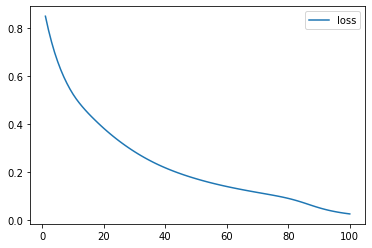

In [15]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

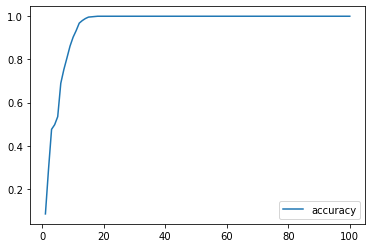

In [16]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [12]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0195 - accuracy: 1.0000
Loss: 0.019464954018592835, Accuracy: 1.0
